Topic:        Challenge Set 1

Subject:      Explore MTA turnstile data

Date:         01/16/2018

Name:         Browning Gentry

Worked with:  

# Challenge 1

In [13]:
import csv

#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_180113.txt

with open('turnstile_180113.txt') as csvfile:
    f = csv.reader(csvfile)
    rows = [[cell.strip() for cell in row] for row in f]

rows = rows[1:]

In [14]:
from collections import defaultdict
dict_mta = defaultdict(list)

for line in rows:
        dict_mta[tuple(line[:4])].append(line[4:])

In [15]:
next(iter(dict_mta.values()))

[['NQR456W',
  'BMT',
  '01/06/2018',
  '03:00:00',
  'REGULAR',
  '0006470216',
  '0002190123'],
 ['NQR456W',
  'BMT',
  '01/06/2018',
  '07:00:00',
  'REGULAR',
  '0006470223',
  '0002190140'],
 ['NQR456W',
  'BMT',
  '01/06/2018',
  '11:00:00',
  'REGULAR',
  '0006470256',
  '0002190229'],
 ['NQR456W',
  'BMT',
  '01/06/2018',
  '15:00:00',
  'REGULAR',
  '0006470379',
  '0002190299'],
 ['NQR456W',
  'BMT',
  '01/06/2018',
  '19:00:00',
  'REGULAR',
  '0006470665',
  '0002190366'],
 ['NQR456W',
  'BMT',
  '01/06/2018',
  '23:00:00',
  'REGULAR',
  '0006470809',
  '0002190398'],
 ['NQR456W',
  'BMT',
  '01/07/2018',
  '03:00:00',
  'REGULAR',
  '0006470843',
  '0002190405'],
 ['NQR456W',
  'BMT',
  '01/07/2018',
  '07:00:00',
  'REGULAR',
  '0006470849',
  '0002190411'],
 ['NQR456W',
  'BMT',
  '01/07/2018',
  '11:00:00',
  'REGULAR',
  '0006470884',
  '0002190488'],
 ['NQR456W',
  'BMT',
  '01/07/2018',
  '15:00:00',
  'REGULAR',
  '0006471042',
  '0002190530'],
 ['NQR456W',
  'BMT'

# Challenge 2

In [16]:
from datetime import datetime
from operator import itemgetter

dict_ts = defaultdict(list)

for key in dict_mta:
    for index, row in enumerate(dict_mta[key]):
        timestamp = datetime.strptime(row[2] + " " + row[3], "%m/%d/%Y %H:%M:%S")
        dict_ts[key].append([timestamp, int(dict_mta[key][index][5])])
    dict_ts[key].sort(key = itemgetter(0))
    for index, row in enumerate(dict_ts[key]):
        if index == len(dict_ts[key])-1:
            dict_ts[key][index][1] = 0
        else:
            dict_ts[key][index][1] = dict_ts[key][index+1][1] - dict_ts[key][index][1]

In [10]:
next(iter(dict_ts.values()))

[[datetime.datetime(2018, 1, 6, 3, 0), 7],
 [datetime.datetime(2018, 1, 6, 7, 0), 33],
 [datetime.datetime(2018, 1, 6, 11, 0), 123],
 [datetime.datetime(2018, 1, 6, 15, 0), 286],
 [datetime.datetime(2018, 1, 6, 19, 0), 144],
 [datetime.datetime(2018, 1, 6, 23, 0), 34],
 [datetime.datetime(2018, 1, 7, 3, 0), 6],
 [datetime.datetime(2018, 1, 7, 7, 0), 35],
 [datetime.datetime(2018, 1, 7, 11, 0), 158],
 [datetime.datetime(2018, 1, 7, 15, 0), 180],
 [datetime.datetime(2018, 1, 7, 19, 0), 105],
 [datetime.datetime(2018, 1, 7, 23, 0), 14],
 [datetime.datetime(2018, 1, 8, 3, 0), 12],
 [datetime.datetime(2018, 1, 8, 7, 0), 148],
 [datetime.datetime(2018, 1, 8, 11, 0), 202],
 [datetime.datetime(2018, 1, 8, 15, 0), 802],
 [datetime.datetime(2018, 1, 8, 19, 0), 242],
 [datetime.datetime(2018, 1, 8, 23, 0), 25],
 [datetime.datetime(2018, 1, 9, 3, 0), 12],
 [datetime.datetime(2018, 1, 9, 7, 0), 140],
 [datetime.datetime(2018, 1, 9, 11, 0), 206],
 [datetime.datetime(2018, 1, 9, 15, 0), 822],
 [datet

# Challenge 3

In [17]:
#originally made this a dictionary of lists
import numpy as np

dict_day = defaultdict(list)
n = -1
entry_totals = 0
ts_list = []

for key in dict_ts:
    cur_day = dict_ts[key][0][0].date()
    for row in dict_ts[key]:
        if cur_day != row[0].date():
            dict_day[key].append([cur_day, entry_totals])
            cur_day = row[0].date()
            ts_list.append(n)
            n = -1
            entry_totals = 0
        n += 1
        entry_totals += row[1]
    dict_day[key].append([cur_day, entry_totals])
            
print('n =' , np.mean(ts_list))


n = 6.12935587933


In [18]:
#later realized that would be hard for challenge 5, now dictionary of dictionaries
dict_day = {}
n = -1
entry_totals = 0
ts_list = []

for key in dict_ts:
    cur_day = dict_ts[key][0][0].date()
    dict_d = defaultdict(int)
    for row in dict_ts[key]:
        if cur_day != row[0].date():
            dict_d[cur_day] = entry_totals
            cur_day = row[0].date()
            ts_list.append(n)
            n = -1
            entry_totals = 0
        n += 1
        entry_totals += row[1]
    dict_d[cur_day] = entry_totals
    entry_totals = 0
    dict_day[key] = dict_d

            
print('n =' , np.mean(ts_list))

n = 6.12935587933


# Challenge 4

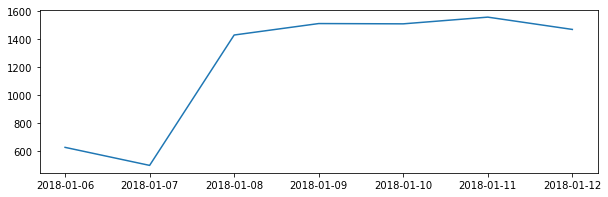

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

dates = []
counts = []

for key in dict_day[('A002','R051','02-00-00','59 ST')]:
    dates.append(key)
    counts.append(dict_day[('A002','R051','02-00-00','59 ST')][key])

plt.figure(figsize=(10,3))
plt.plot(dates,counts);

# Challenge 5

In [20]:
dict_group = {}

for key in dict_day:
    new_key = list(key[0:2])
    new_key.append(key[3])
    new_key = tuple(new_key)
    if new_key not in dict_group:
        dict_grp = {}
        for day in dict_day[key]:
            dict_grp[day] = 0
        dict_group[new_key] = dict_grp
    for d in dict_day[key]:
        if d not in dict_group[new_key]:
            dict_group[new_key][d] = 0
        dict_group[new_key][d] += dict_day[key][d]

In [21]:
next(iter(dict_group.values()))

{datetime.date(2018, 1, 6): 6855,
 datetime.date(2018, 1, 7): 5222,
 datetime.date(2018, 1, 8): 12904,
 datetime.date(2018, 1, 9): 13816,
 datetime.date(2018, 1, 10): 13692,
 datetime.date(2018, 1, 11): 13747,
 datetime.date(2018, 1, 12): 12551}

# Challenge 6

In [23]:
dict_station = {}

for key in dict_day:
    new_key = key[3]
    if new_key not in dict_station:
        dict_sta = {}
        for day in dict_day[key]:
            dict_sta[day] = 0
        dict_station[new_key] = dict_sta
    for d in dict_day[key]:
        if d not in dict_station[new_key]:
            dict_station[new_key][d] = 0
        dict_station[new_key][d] += dict_day[key][d]

In [24]:
next(iter(dict_station.values()))

{datetime.date(2018, 1, 6): 28367,
 datetime.date(2018, 1, 7): 21510,
 datetime.date(2018, 1, 8): 60379,
 datetime.date(2018, 1, 9): 64386,
 datetime.date(2018, 1, 10): 63552,
 datetime.date(2018, 1, 11): 64024,
 datetime.date(2018, 1, 12): 58322}

# Challenge 7

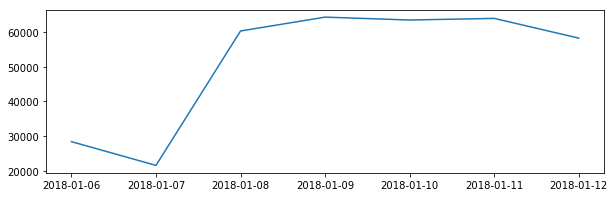

In [25]:
dates = []
counts = []

for key in dict_station[('59 ST')]:
    dates.append(key)
    counts.append(dict_station[('59 ST')][key])

plt.figure(figsize=(10,3))
plt.plot(dates,counts);

# Challenge 8

In [26]:
import csv
from collections import defaultdict
from datetime import timedelta
from datetime import datetime
from operator import itemgetter
import urllib.request

week = 0
date_str = '180113'
date_date = datetime.strptime(date_str, '%y%m%d')
main_list = []

for week in range(3):
    date_str = datetime.strftime(date_date, "%y%m%d")
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + date_str +".txt"
    #urllib.request.urlretrieve(url, 'turnstile_' + date_str + '.txt')
    
    with open('turnstile_' + date_str + '.txt') as csvfile:
        f = csv.reader(csvfile)
        rows = [[cell.strip() for cell in row] for row in f]
    rows = rows[1:]
    
    
    dict_mta = defaultdict(list)
    main_list.append(dict_mta)
    
    for line in rows:
            dict_mta[tuple(line[:4])].append(line[4:])
            
    date_date = datetime.strptime(date_str, '%y%m%d')
    date_date = date_date - timedelta(days=7)


In [27]:
for i in range(len(main_list)):
    dict_ts = defaultdict(list)
    for key in main_list[i]:
        for index, row in enumerate(main_list[i][key]):
            timestamp = datetime.strptime(row[2] + " " + row[3], "%m/%d/%Y %H:%M:%S")
            dict_ts[key].append([timestamp, int(main_list[i][key][index][5])])
        dict_ts[key].sort(key = itemgetter(0))
        for index, row in enumerate(dict_ts[key]):
            if index == len(dict_ts[key])-1:
                dict_ts[key][index][1] = 0
            else:
                dict_ts[key][index][1] = dict_ts[key][index+1][1] - dict_ts[key][index][1]
    main_list[i] = dict_ts
    
 

In [28]:
for i in range(len(main_list)):
    dict_day = {}
    n = -1
    entry_totals = 0
    ts_list = []

    for key in main_list[i]:
        cur_day = main_list[i][key][0][0].date()
        dict_d = defaultdict(int)
        for row in main_list[i][key]:
            if cur_day != row[0].date():
                dict_d[cur_day] = entry_totals
                cur_day = row[0].date()
                ts_list.append(n)
                n = -1
                entry_totals = 0
            n += 1
            entry_totals += row[1]
        dict_d[cur_day] = entry_totals
        entry_totals = 0
        dict_day[key] = dict_d
    main_list[i] = dict_day

In [29]:
for i in range(len(main_list)):
    dict_station = {}

    for key in main_list[i]:
        new_key = key[3]
        if new_key not in dict_station:
            dict_sta = {}
            for day in main_list[i][key]:
                dict_sta[day] = 0
            dict_station[new_key] = dict_sta
        for d in main_list[i][key]:
            if d not in dict_station[new_key]:
                dict_station[new_key][d] = 0
            dict_station[new_key][d] += main_list[i][key][d]
    main_list[i] = dict_station

In [30]:
import copy
list_2 = copy.deepcopy(main_list)

for i in range(len(main_list)):
    for key in main_list[i]:
        for dt in main_list[i][key]:
            day_name = datetime.strftime(dt, '%A')
            list_2[i][key][day_name] = list_2[i][key].pop(dt)
            
day_list = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

out_list = []

for i in range(len(list_2)):
    count_list = []
    for day in day_list:
        count_list.append(list_2[i]['UTICA AV'][day])
    out_list.append(count_list)


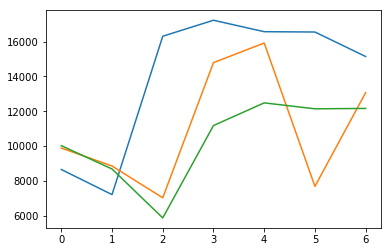

In [31]:
for i in range(len(list_2)):
    plt.plot(out_list[i])

# Challenge 9

In [33]:
station_totals = defaultdict(int)

for i in range(len(main_list)):
    for key in main_list[i]:
        for dt in main_list[i][key]:
            station_totals[key] += main_list[i][key][dt]   

In [34]:
next(iter(station_totals.values()))

942897

# Challenge 10

In [150]:
totals_list = []

for key in station_totals:
    if station_totals[key] >=0:
        totals_list.append(station_totals[key])

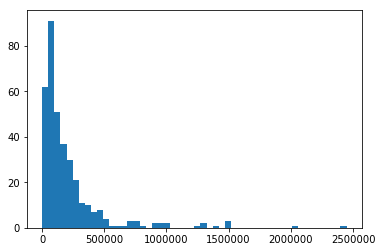

In [151]:
plt.hist(totals_list, bins=50);

<Container object of 357 artists>

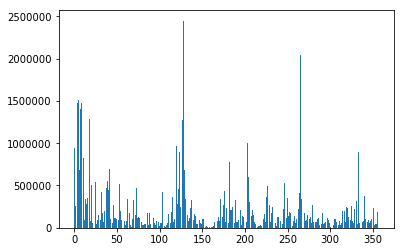

In [157]:
indices = range(len(totals_list))
plt.bar(indices, totals_list)